In [2]:
from qiskit import *
from qiskit.visualization import *
from qiskit.circuit.library import *
import math

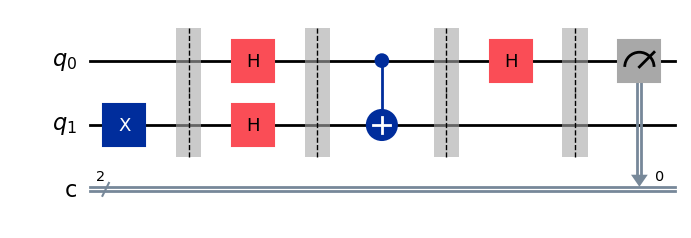

In [13]:
# Define constant oracle function
def constant_oracle(qureg):
    # Do nothing
     pass

# Define balanced oracle function
def balanced_oracle(circuit):
    # Apply a CNOT gate with the first
    # qubit as a source and the second 
    # as a target
    circuit.cx(0,1)


# Deutsch algorithm
oracle_func = balanced_oracle

# Create a circuit with 2 qubits
circuit = QuantumCircuit(2,2)

# Set qubit_1 to state |1>
circuit.x(1)
circuit.barrier()

# Set both qubits in superposition
circuit.h([0,1])
circuit.barrier()

# Apply oracle function to qureg
# If oracle_func == balanced_oracle then the function is balanced and the circuit changes
# Otherwise the circuit remains unchanged
oracle_func(circuit)
circuit.barrier()

# Put first qubit out of superposition
circuit.h(0)
circuit.barrier()

# Measure the circuit
circuit.measure(0, 0)

circuit.draw("mpl")

## Executing on Qiskit Simulator

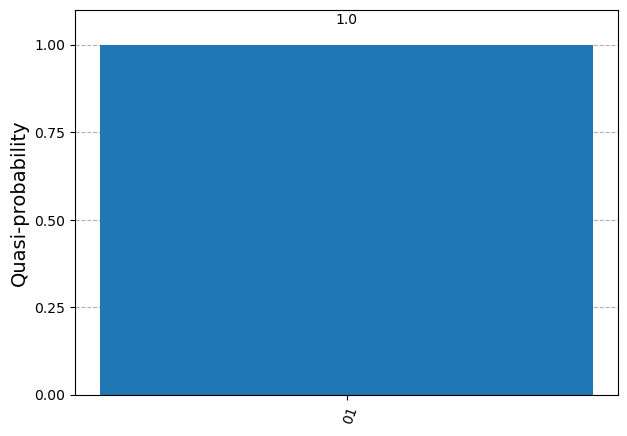

In [14]:
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import Session, SamplerV2 as Sampler, QiskitRuntimeService

# Initialize Aer Simulator
aer_sim = AerSimulator()

# Generate instructions for sampler
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_qc = pm.run(circuit)

# Create session using simulator and run
with Session(backend=aer_sim) as session:
    sampler = Sampler()
    result = sampler.run([isa_qc]).result()._pub_results[0].data.c.get_counts()

plot_distribution(result)

## Executing on Quantum Computer

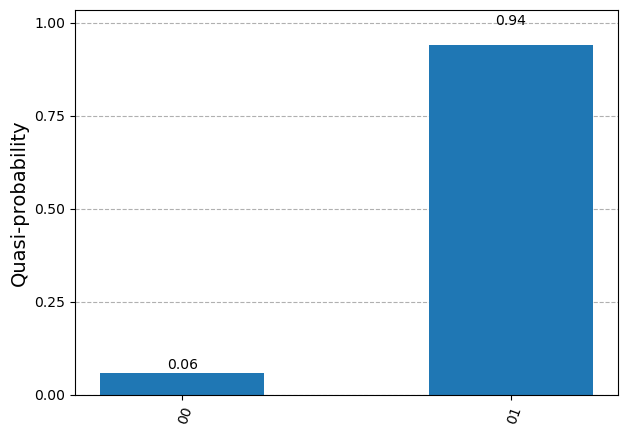

In [61]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler

# Load account from token file
with open("token.txt", "r") as f:
    token = f.readlines()[0]

service = QiskitRuntimeService()
service.save_account(channel="ibm_quantum", token=token, overwrite=True, set_as_default=True)

# Choose backend, for ease of use we pick the least busy one
backend = service.least_busy(operational=True, simulator=False, min_num_qubits=2)

# Generate instructions for sampler
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_qc = pm.run(circuit)

# Create session for a Quantum Computer and run
with Session(backend=backend) as session:
    sampler = Sampler()
    result = sampler.run([isa_qc]).result()._pub_results[0].data.c.get_counts()

plot_distribution(result)